In [281]:
import re
import numpy as np
import math
from matplotlib import pyplot as plt
from functools import lru_cache

In [321]:
with open("example.txt") as f:
    data = f.read()
    lines = data.strip().split("\n")
    records = data.strip().split("\n\n")

In [382]:
with open("input.txt") as f:
    data = f.read()
    lines = data.strip().split("\n")   
    records = data.strip().split("\n\n")

In [383]:
class wrapped_array():
    arr = []
    index = 0
    
    def __init__(self,arr):
        self.arr = arr
        self.index = 0
    
    def get_next(self):
        next_thing = self.arr[self.index]
        self.index = (self.index+1) % len(self.arr)
        return next_thing

    def __repr__(self):
        return "("+str(self.arr)+","+str(self.index)+")"

In [384]:
#board = np.array([list(x) for x in lines])
wind = wrapped_array(lines[0])


In [385]:
for _ in range(100):
    wind.get_next()

In [386]:
raw_stones = [
    np.array([[1,1,1,1]]),
    np.array([[0,1,0],[1,1,1],[0,1,0]]),
    np.array([[1,1,1],[0,0,1],[0,0,1]]),
    np.array([[1],[1],[1],[1]]),
    np.array([[1,1],[1,1]])
]
stones = wrapped_array(raw_stones)
    
"""
####
    
.#.
###
.#.

..#
..#
###

#
#
#
#

##
##"""
print(stones)

([array([[1, 1, 1, 1]]), array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]]), array([[1, 1, 1],
       [0, 0, 1],
       [0, 0, 1]]), array([[1],
       [1],
       [1],
       [1]]), array([[1, 1],
       [1, 1]])],0)


In [387]:
num_falling_rocks = 2022

In [388]:
tunnel = np.zeros([2022*3,7])
tunnel.shape
# we'll plan on rotating this down and keeping track of how far we go

(6066, 7)

In [389]:
#((tunnel[1:4,1:4] + stones[1]) == 1).any()
#tunnel[1:4,1:4] += stones[1])

In [390]:


def place_stone(tunnel,stone,point):
    y, x = point
    ysize, xsize = stone.shape
    xmax, ymax = (x + xsize), (y + ysize)
    tunnel[y:ymax, x:xmax] += stone
    return tunnel

def can_drop(tunnel,stone,point):
    y, x = point
    y -= 1
    return place_is_legal(tunnel,stone,(y,x))

def place_is_legal(tunnel,stone,point):
    y, x = point
    ysize, xsize = stone.shape
    xmax, ymax = (x + xsize), (y + ysize)
    if not ( y >= 0 and x >= 0 and x < tunnel.shape[1]):
        return False
    tmp = tunnel[y:ymax, x:xmax] + stone
    return not (tmp>1).any()

def find_highest_set_space(tunnel):
    indexes = np.where(tunnel > 0)[0]
    return max(indexes) if len(indexes) > 0 else -1

def push_wind(tunnel,stone,index,wind):
    #print(index)
    #print(stone.shape)
    direction = 1 if wind.get_next() == ">" else -1
    if direction > 0:
        if index[1]+stone.shape[1]-1+direction >= tunnel.shape[1]:
            return index
    if direction < 0:
        if index[1]+direction < 0:
            return index
    tentative_index = (index[0],index[1]+direction)
    if place_is_legal(tunnel,stone,tentative_index):
        return tentative_index
    else:
        return index
    
    
def squish(tunnel):
    y = find_highest_set_space(tunnel)
    tmp = tunnel[y-9:y,:]
    return inner_squish(tmp)
    
def inner_squish(tmp):
    tmp1 = 0
    tmp = tmp.ravel()
    for i in range(len(tmp)):
        if tmp[i] > 0:
            tmp1+= int(tmp[i])<<i
    return int(tmp1)

In [391]:
stone = stones.get_next()
first_i = 0

In [392]:
can_drop(tunnel,stone,(1,2))

True

In [393]:
find_highest_set_space(tunnel)

-1

In [398]:
max_t = 100000

tunnel = np.zeros([max_t*3,7])
stone_index = 0
stones = wrapped_array(raw_stones)
wind = wrapped_array(lines[0])
loop = {}
for i in range(max_t):
    stone = stones.get_next()
    # start 3 up from highest block
    index = (find_highest_set_space(tunnel)+4,2)
    isStable = False
    while not isStable:
        # push wind
        #print(index)
        index = push_wind(tunnel,stone,index,wind)
        #print(index)

        # drop
        if can_drop(tunnel,stone,index):
            index = (index[0]-1,index[1])
            #print(index)
        else:
            isStable = True
        #print("end loop")
    place_stone(tunnel,stone,index)
    if i > 10:
        t = squish(tunnel)
        state = (t,stones.index,wind.index)
        if state in loop:
            print("found loop at i = ",i)
            print(state)
            print("old",loop[state])
            print("new",i,index)
            first_i,first_point,first_y = loop[state]
            last_i,last_point,last_y = (i,index,find_highest_set_space(tunnel))
            break
        loop[state] = (i,index,find_highest_set_space(tunnel))
    if (i % 100) == 0:
        print(i)
    if i == left_over_i:
        print("final offset",i)
        print("y value is",find_highest_set_space(tunnel))  
        left_over_y = find_highest_set_space(tunnel)
        break

        
    #stone_index = wrap_incr(stones,stone_index)
print(find_highest_set_space(tunnel))

0
100
200
300
400
500
600
700
800
900
1000
final offset 1010
y value is 1629
1629


In [399]:
# index
d_i = last_i-first_i
print(first_i)
print(last_i)
print(d_i)

187
1932
1745


In [400]:
# hight
d_y = last_y-first_y
print(first_y)
print(last_y)
print(d_y)
print(left_over_y)
left_over_i = (1000000000000)%d_i
print(left_over_i)

300
3053
2753
1629
1010


In [401]:
((1000000000000)//d_i) * d_y + left_over_y

1577650429835

In [380]:
1514285714288

1514285714288

In [ ]:
#guessed 1577650429814, too low

In [ ]:
#guessed 1577650430112, too high

In [302]:
188+1010

1198

In [258]:
print(find_highest_set_space(tunnel)+1)

3193


In [260]:
len(lines[0])

10091

In [269]:
y = find_highest_set_space(tunnel)


In [280]:
tmp1 = 0
tmp = tunnel[y-9:y,:]
tmp = tmp.ravel()
for i in range(len(tmp)):
    if tmp[i] > 0:
        tmp1+= int(tmp[i])<<i
print(tmp1)
print(len(tmp))

539430165999223167
63


In [271]:
print(tmp.ravel())

[0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.]


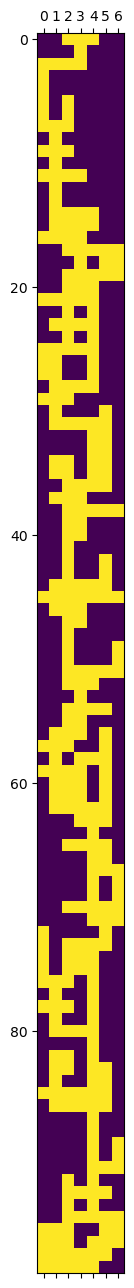

In [259]:
plt.matshow(np.flip(tunnel[:100,:],0))

In [218]:
np.where(tunnel > 1)

(array([], dtype=int64), array([], dtype=int64))